In [19]:
!pip install pandas matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline
sns.set(style="whitegrid")


# ‡¶°‡ßá‡¶ü‡¶æ ‡¶≤‡ßã‡¶° 

In [ ]:
df = pd.read_csv('insurance.csv')


## ‡¶°‡ßá‡¶ü‡¶æ ‡¶¶‡ßá‡¶ñ‡¶¨‡ßã


In [21]:


display(df.head())
print("\nInfo:")
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nBasic stats:")
display(df.describe())


age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Basic stats:


age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

# charges distribution


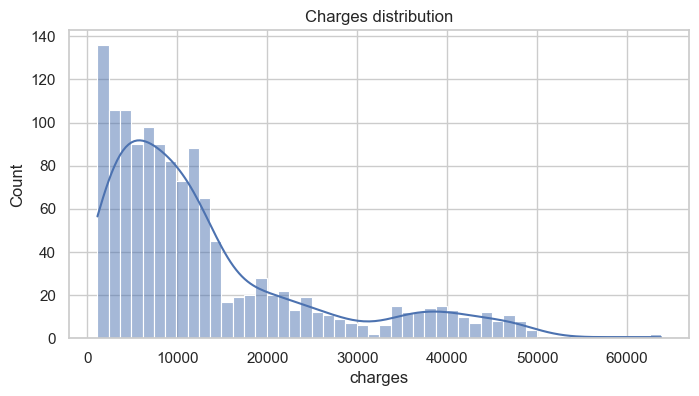

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Charges distribution')
plt.show()


# smoker vs charges boxplot


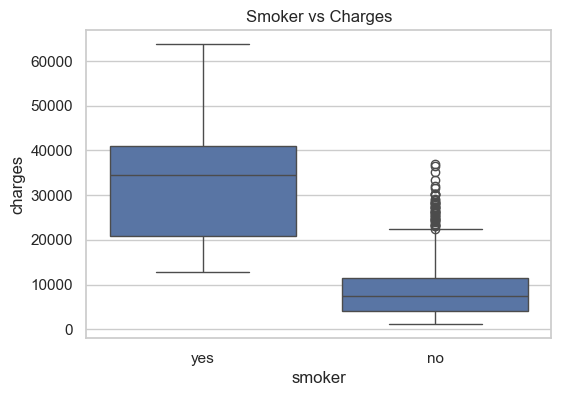

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs Charges')
plt.show()


# age vs charges scatter


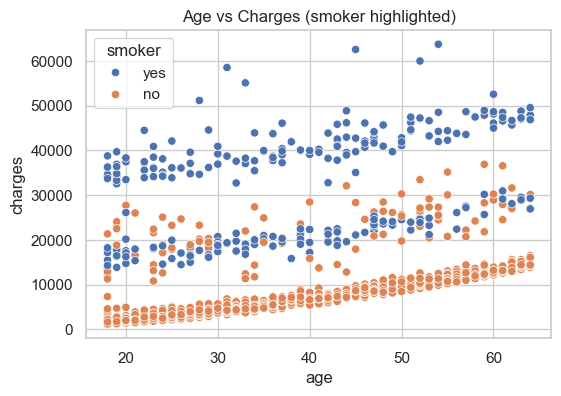

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Charges (smoker highlighted)')
plt.show()


# correlation heatmap for numeric cols


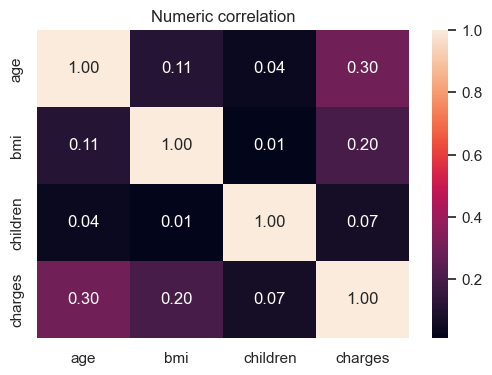

In [25]:
num_cols = ['age','bmi','children','charges']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f")
plt.title('Numeric correlation')
plt.show()


# duplicate ‡¶ö‡ßá‡¶ï ‡¶ì drop


In [26]:
print("Before duplicates:", len(df))
df = df.drop_duplicates()
print("After duplicates:", len(df))

Before duplicates: 1338
After duplicates: 1337


# ‡¶Ø‡¶¶‡¶ø rare category ‡¶ñ‡ßÅ‡¶¨ ‡¶ï‡¶Æ ‡¶π‡ßü‡ßá ‡¶•‡¶æ‡¶ï‡ßá ‡¶§‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶®‡¶∏‡ßã‡¶≤‡¶ø‡¶°‡ßá‡¶ü ‡¶ï‡¶∞‡¶æ‡¶∞ ‡¶¶‡¶∞‡¶ï‡¶æ‡¶∞ ‡¶Ü‡¶õ‡ßá ‡¶ï‡¶ø‡¶®‡¶æ ‡¶ö‡ßá‡¶ï ‡¶ï‡¶∞‡ßã


In [27]:
print(df['region'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64
sex
male      675
female    662
Name: count, dtype: int64
smoker
no     1063
yes     274
Name: count, dtype: int64


X and Y defined

In [29]:
X = df.drop('charges', axis=1)
y = df['charges']


### ‡¶°‡ßá‡¶ü‡¶æ‡¶∏‡ßá‡¶ü ‡¶≠‡¶æ‡¶ó ‡¶ï‡¶∞‡¶æ

‡¶è‡¶á ‡¶ï‡ßã‡¶°‡ßá `train_test_split` ‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßá ‡¶¨‡ßà‡¶∂‡¶ø‡¶∑‡ßç‡¶ü‡ßç‡¶Ø (`X`) ‡¶è‡¶¨‡¶Ç ‡¶≤‡¶ï‡ßç‡¶∑‡ßç‡¶Ø (`y`) ‡¶°‡ßá‡¶ü‡¶æ‡¶ï‡ßá ‡¶ü‡ßç‡¶∞‡ßá‡¶®‡¶ø‡¶Ç ‡¶ì ‡¶ü‡ßá‡¶∏‡ßç‡¶ü‡¶ø‡¶Ç ‡¶∏‡ßá‡¶ü‡ßá ‡¶≠‡¶æ‡¶ó ‡¶ï‡¶∞‡¶æ ‡¶π‡ßü‡ßá‡¶õ‡ßá‡•§ ‡ß≠‡ß¶% ‡¶°‡ßá‡¶ü‡¶æ ‡¶ü‡ßç‡¶∞‡ßá‡¶®‡¶ø‡¶Ç‡ßü‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶è‡¶¨‡¶Ç ‡ß©‡ß¶% ‡¶°‡ßá‡¶ü‡¶æ ‡¶ü‡ßá‡¶∏‡ßç‡¶ü‡¶ø‡¶Ç‡ßü‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡ßÉ‡¶§ ‡¶π‡ßü‡•§ `random_state=42` ‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞ ‡¶ï‡¶∞‡¶æ‡¶∞ ‡¶´‡¶≤‡ßá ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶¨‡¶æ‡¶∞ ‡¶è‡¶ï‡¶á‡¶≠‡¶æ‡¶¨‡ßá ‡¶°‡ßá‡¶ü‡¶æ ‡¶≠‡¶æ‡¶ó ‡¶π‡¶¨‡ßá‡•§

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### ‡ßß. `pd.get_dummies(X_train, drop_first=True)`
- `X_train` ‡¶°‡ßá‡¶ü‡¶æ‡¶∏‡ßá‡¶ü‡ßá‡¶∞ **categorical ‡¶ï‡¶≤‡¶æ‡¶Æ‡¶ó‡ßÅ‡¶≤‡ßã** ‡¶ï‡ßá **one-hot encoding** ‡¶ï‡¶∞‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§
- `drop_first=True` ‡¶¶‡ßá‡¶ì‡ßü‡¶æ‡¶∞ ‡¶ï‡¶æ‡¶∞‡¶£‡ßá ‡¶™‡ßç‡¶∞‡¶•‡¶Æ ‡¶ï‡ßç‡¶Ø‡¶æ‡¶ü‡¶æ‡¶ó‡¶∞‡¶ø‡¶ï‡ßá ‡¶¨‡¶æ‡¶¶ ‡¶¶‡ßá‡¶ì‡ßü‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá (dummy variable trap ‡¶è‡ßú‡¶æ‡¶®‡ßã‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø)‡•§

### ‡ß®. `pd.get_dummies(X_test, drop_first=True)`
- ‡¶è‡¶ï‡¶á‡¶≠‡¶æ‡¶¨‡ßá `X_test` ‡¶°‡ßá‡¶ü‡¶æ‡¶∏‡ßá‡¶ü‡ßá‡¶∞ categorical ‡¶ï‡¶≤‡¶æ‡¶Æ‡¶ó‡ßÅ‡¶≤‡ßã‡¶ì one-hot encoding ‡¶ï‡¶∞‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§

### ‡ß©. `X_test = X_test.reindex(columns=X_train.columns, fill_value=0)`
- `X_train` ‡¶Ü‡¶∞ `X_test` ‡¶è‡¶∞ ‡¶ï‡¶≤‡¶æ‡¶Æ‡¶ó‡ßÅ‡¶≤‡ßã ‡¶∏‡¶Æ‡¶æ‡¶® ‡¶®‡¶æ-‡¶ì ‡¶π‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡ßá (‡¶ï‡¶æ‡¶∞‡¶£ ‡¶ï‡¶ø‡¶õ‡ßÅ ‡¶ï‡ßç‡¶Ø‡¶æ‡¶ü‡¶æ‡¶ó‡¶∞‡¶ø train ‡¶°‡ßá‡¶ü‡¶æ‡¶§‡ßá ‡¶Ü‡¶õ‡ßá ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ test ‡¶°‡ßá‡¶ü‡¶æ‡¶§‡ßá ‡¶®‡¶æ‡¶á, ‡¶¨‡¶æ ‡¶â‡¶≤‡ßç‡¶ü‡ßã‡¶ü‡¶æ)‡•§
- ‡¶§‡¶æ‡¶á `X_test` ‡¶è‡¶∞ ‡¶ï‡¶≤‡¶æ‡¶Æ‡¶ó‡ßÅ‡¶≤‡ßã‡¶ï‡ßá `X_train.columns` ‡¶Ö‡¶®‡ßÅ‡¶Ø‡¶æ‡ßü‡ßÄ **reindex** ‡¶ï‡¶∞‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§
- ‡¶Ø‡ßá‡¶∏‡¶¨ ‡¶ï‡¶≤‡¶æ‡¶Æ `X_test` ‡¶è ‡¶®‡¶æ‡¶á, ‡¶∏‡ßá‡¶ó‡ßÅ‡¶≤‡ßã‡¶ï‡ßá **fill_value=0** ‡¶¶‡¶ø‡ßü‡ßá ‡¶™‡ßÇ‡¶∞‡¶£ ‡¶ï‡¶∞‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§
- ‡¶´‡¶≤‡ßá `X_train` ‡¶Ü‡¶∞ `X_test` ‡¶è‡¶∞ ‡¶´‡¶ø‡¶ö‡¶æ‡¶∞ ‡¶ï‡¶≤‡¶æ‡¶Æ‡¶ó‡ßÅ‡¶≤‡ßã ‡¶è‡¶ï‡¶∞‡¶ï‡¶Æ ‡¶π‡ßü‡ßá ‡¶Ø‡¶æ‡ßü, ‡¶Ø‡¶æ ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶ü‡ßç‡¶∞‡ßá‡¶®‡¶ø‡¶Ç ‡¶Ü‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡¶∂‡¶®‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶ñ‡ßÅ‡¶¨‡¶á ‡¶ú‡¶∞‡ßÅ‡¶∞‡¶ø‡•§

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


### ‡ßß. `from sklearn.ensemble import RandomForestRegressor`
- `scikit-learn` ‡¶≤‡¶æ‡¶á‡¶¨‡ßç‡¶∞‡ßá‡¶∞‡¶ø ‡¶•‡ßá‡¶ï‡ßá **Random Forest Regressor** ‡¶Æ‡¶°‡ßá‡¶≤‡¶ü‡¶ø ‡¶á‡¶Æ‡¶™‡ßã‡¶∞‡ßç‡¶ü ‡¶ï‡¶∞‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§
- ‡¶è‡¶ü‡¶ø ‡¶è‡¶ï‡¶ü‡¶ø **ensemble learning algorithm**, ‡¶Ø‡ßá‡¶ü‡¶æ ‡¶Ö‡¶®‡ßá‡¶ï‡¶ó‡ßÅ‡¶≤‡ßã decision tree ‡¶§‡ßà‡¶∞‡¶ø ‡¶ï‡¶∞‡ßá ‡¶è‡¶¨‡¶Ç ‡¶§‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ó‡ßú (average) ‡¶´‡¶≤‡¶æ‡¶´‡¶≤ ‡¶¶‡ßá‡ßü‡•§

---

### ‡ß®. 
`
model = RandomForestRegressor(random_state=42)`
‡¶è‡¶ñ‡¶æ‡¶®‡ßá ‡¶è‡¶ï‡¶ü‡¶ø RandomForestRegressor ‡¶Ö‡¶¨‡¶ú‡ßá‡¶ï‡ßç‡¶ü ‡¶§‡ßà‡¶∞‡¶ø ‡¶ï‡¶∞‡¶æ ‡¶π‡ßü‡ßá‡¶õ‡ßá‡•§

random_state=42 ‡¶∏‡ßá‡¶ü ‡¶ï‡¶∞‡¶æ‡¶∞ ‡¶Æ‡¶æ‡¶®‡ßá ‡¶π‡¶≤‡ßã ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶¨‡¶æ‡¶∞ ‡¶è‡¶ï‡¶á ‡¶∞‡¶ï‡¶Æ ‡¶´‡¶≤‡¶æ‡¶´‡¶≤ ‡¶™‡ßá‡¶§‡ßá ‡¶∞‚Äç‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶°‡¶Æ ‡¶∏‡¶Ç‡¶ñ‡ßç‡¶Ø‡¶æ ‡¶´‡¶ø‡¶ï‡ßç‡¶∏‡¶° ‡¶∞‡¶æ‡¶ñ‡¶æ‡•§

### ‡ß©.


`model.fit(X_train, y_train)`
X_train (‡¶´‡¶ø‡¶ö‡¶æ‡¶∞ ‡¶°‡ßá‡¶ü‡¶æ) ‡¶è‡¶¨‡¶Ç y_train (‡¶ü‡¶æ‡¶∞‡ßç‡¶ó‡ßá‡¶ü ‡¶≠‡ßá‡¶∞‡¶ø‡ßü‡ßá‡¶¨‡¶≤) ‡¶¨‡ßç‡¶Ø‡¶¨‡¶π‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßá ‡¶Æ‡¶°‡ßá‡¶≤‡¶ü‡¶ø ‡¶ü‡ßç‡¶∞‡ßá‡¶® ‡¶ï‡¶∞‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§

‡¶Ö‡¶∞‡ßç‡¶•‡¶æ‡ßé, ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶∂‡¶ø‡¶ñ‡ßá ‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡ßá ‡¶ï‡¶ø‡¶≠‡¶æ‡¶¨‡ßá ‡¶á‡¶®‡¶™‡ßÅ‡¶ü ‡¶´‡¶ø‡¶ö‡¶æ‡¶∞ ‡¶•‡ßá‡¶ï‡ßá ‡¶Ü‡¶â‡¶ü‡¶™‡ßÅ‡¶ü ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡ßç‡¶ü ‡¶ï‡¶∞‡¶§‡ßá ‡¶π‡ßü‡•§

### ‡ß™.


`y_pred = model.predict(X_test)`
X_test ‡¶è‡¶∞ ‡¶â‡¶™‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡¶∂‡¶® ‡¶ï‡¶∞‡¶æ ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§

‡¶Ü‡¶â‡¶ü‡¶™‡ßÅ‡¶ü ‡¶π‡¶ø‡¶∏‡ßá‡¶¨‡ßá y_pred ‡¶™‡¶æ‡¶ì‡ßü‡¶æ ‡¶Ø‡¶æ‡¶¨‡ßá, ‡¶Ø‡ßá‡¶ñ‡¶æ‡¶®‡ßá ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶ü‡¶ø ‡¶∞‡ßã ‡¶è‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡ßç‡¶ü‡ßá‡¶° ‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡ßÅ ‡¶•‡¶æ‡¶ï‡¶¨‡ßá‡•§

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


## MSE , RMSE 

## üìä ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶™‡¶æ‡¶∞‡¶´‡¶∞‡¶Æ‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶∏ ‡¶Æ‡ßá‡¶ü‡ßç‡¶∞‡¶ø‡¶ï‡ßç‡¶∏ 

### ‡ßß. RMSE (Root Mean Squared Error)
- RMSE ‡¶Æ‡¶æ‡¶®‡ßá ‡¶π‡¶≤‡ßã ‡¶Ü‡¶∏‡¶≤ ‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡ßÅ ‡¶Ü‡¶∞ ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡ßç‡¶ü‡ßá‡¶° ‡¶≠‡ßç‡¶Ø‡¶æ‡¶≤‡ßÅ‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá ‡¶ó‡ßú **‡¶§‡ßç‡¶∞‡ßÅ‡¶ü‡¶ø (error)** ‡¶ï‡¶§‡¶ü‡¶æ‡•§
- ‡¶è‡¶ü‡¶ø ‡¶∏‡¶¨ error ‡¶ó‡ßÅ‡¶≤‡ßã‡¶ï‡ßá ‡¶∏‡ßç‡¶ï‡ßã‡ßü‡¶æ‡¶∞ ‡¶ï‡¶∞‡ßá, ‡¶§‡¶æ‡¶∞‡¶™‡¶∞ ‡¶ó‡ßú ‡¶¨‡ßá‡¶∞ ‡¶ï‡¶∞‡ßá, ‡¶∂‡ßá‡¶∑‡ßá ‡¶§‡¶æ‡¶∞ **‡¶¨‡¶∞‡ßç‡¶ó‡¶Æ‡ßÇ‡¶≤ (‚àö)** ‡¶®‡ßá‡ßü‡•§
- ‡¶Æ‡¶æ‡¶® ‡¶Ø‡¶§ ‡¶õ‡ßã‡¶ü ‡¶π‡¶¨‡ßá, ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶§‡¶§ ‡¶≠‡¶æ‡¶≤‡ßã ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡ßç‡¶ü ‡¶ï‡¶∞‡¶õ‡ßá‡•§
- ‡¶â‡¶¶‡¶æ‡¶π‡¶∞‡¶£:
  - RMSE = 100 ‡¶Æ‡¶æ‡¶®‡ßá ‡¶π‡¶≤‡ßã ‡¶ó‡ßú‡ßá ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡¶∂‡¶®‡ßá ‡¶™‡ßç‡¶∞‡¶æ‡ßü **100 ‡¶á‡¶â‡¶®‡¶ø‡¶ü ‡¶§‡ßç‡¶∞‡ßÅ‡¶ü‡¶ø** ‡¶π‡¶ö‡ßç‡¶õ‡ßá‡•§

---

### ‡ß®. R¬≤ Score (Coefficient of Determination)
- R¬≤ score ‡¶¨‡¶≤‡ßá ‡¶¶‡ßá‡ßü ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶≤ ‡¶°‡ßá‡¶ü‡¶æ‡¶∞ **variance (‡¶¨‡¶ø‡¶≠‡¶ø‡¶®‡ßç‡¶®‡¶§‡¶æ)** ‡¶ï‡¶§‡¶ü‡¶æ ‡¶≠‡¶æ‡¶≤‡ßã‡¶≠‡¶æ‡¶¨‡ßá ‡¶¨‡ßÅ‡¶ù‡¶æ‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶õ‡ßá‡•§
- ‡¶è‡¶∞ ‡¶Æ‡¶æ‡¶® 0 ‡¶•‡ßá‡¶ï‡ßá 1 ‡¶è‡¶∞ ‡¶Æ‡¶ß‡ßç‡¶Ø‡ßá ‡¶•‡¶æ‡¶ï‡ßá (‡¶ï‡¶ñ‡¶®‡¶ì ‡¶®‡ßá‡¶ó‡ßá‡¶ü‡¶ø‡¶≠‡¶ì ‡¶π‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡ßá):
  - **R¬≤ = 1.0 ‚Üí ‡¶è‡¶ï‡¶¶‡¶Æ ‡¶™‡¶æ‡¶∞‡¶´‡ßá‡¶ï‡ßç‡¶ü ‡¶Æ‡¶°‡ßá‡¶≤**
  - **R¬≤ = 0.0 ‚Üí ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶ï‡¶ø‡¶õ‡ßÅ‡¶á ‡¶∂‡¶ø‡¶ñ‡ßá‡¶®‡¶ø (baseline ‡¶è‡¶∞ ‡¶∏‡¶Æ‡¶æ‡¶®)**
  - **R¬≤ < 0 ‚Üí ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶è‡¶≤‡ßã‡¶Æ‡ßá‡¶≤‡ßã‡¶≠‡¶æ‡¶¨‡ßá ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡ßç‡¶ü ‡¶ï‡¶∞‡¶õ‡ßá**

---

‚úÖ **‡¶∏‡¶Ç‡¶ï‡ßç‡¶∑‡ßá‡¶™‡ßá**  
- **RMSE ‚Üí ‡¶™‡ßç‡¶∞‡ßá‡¶°‡¶ø‡¶ï‡¶∂‡¶® ‡¶ï‡¶§‡¶ü‡¶æ ‡¶≠‡ßÅ‡¶≤ ‡¶ï‡¶∞‡¶õ‡ßá (error ‡¶è‡¶∞ ‡¶™‡¶∞‡¶ø‡¶Æ‡¶æ‡¶£)‡•§**  
- **R¬≤ ‚Üí ‡¶Æ‡¶°‡ßá‡¶≤ ‡¶Ü‡¶∏‡¶≤ ‡¶°‡ßá‡¶ü‡¶æ ‡¶ï‡¶§‡¶ü‡¶æ ‡¶≠‡¶æ‡¶≤‡ßã‡¶≠‡¶æ‡¶¨‡ßá explain ‡¶ï‡¶∞‡¶õ‡ßá‡•§**


In [ ]:
from sklearn.metrics import mean_squared_error



mse = mean_squared_error(y_test, y_pred)


rmse = np.sqrt(mse)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 4831.400050734648
R2 Score: 0.8635884812544394


# Feature importance ‡¶™‡¶æ‡¶ì‡ßü‡¶æ
# Features-‡¶è‡¶∞ ‡¶®‡¶æ‡¶Æ‡¶ó‡ßÅ‡¶≤‡ßã
# DataFrame ‡¶¨‡¶æ‡¶®‡¶æ‡¶®‡ßã

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


importance = model.feature_importances_


features = X_train.columns


feat_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)


            Feature  Importance
4        smoker_yes    0.605774
1               bmi    0.209188
0               age    0.140647
2          children    0.021728
3          sex_male    0.006876
6  region_southeast    0.006482
5  region_northwest    0.005552
7  region_southwest    0.003753


 # ‡¶∏‡¶¨‡¶ö‡ßá‡ßü‡ßá important ‡¶â‡¶™‡¶∞‡ßá ‡¶¶‡ßá‡¶ñ‡¶æ‡¶®‡ßã‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø

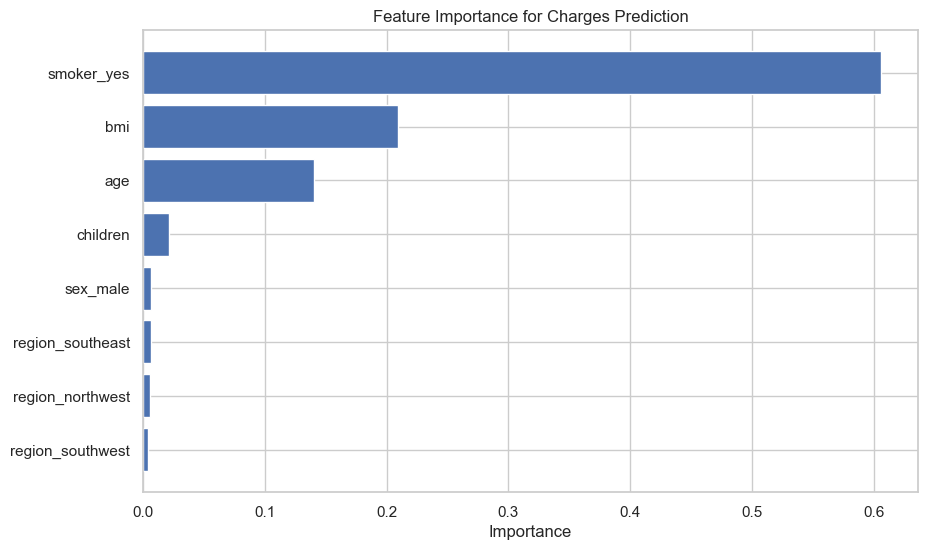

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'])
plt.gca().invert_yaxis() 
plt.xlabel('Importance')
plt.title('Feature Importance for Charges Prediction')
plt.show()


In [ ]:
import joblib


joblib.dump(model, 'full_charges_model.pkl')


['full_charges_model.pkl']